# CAPSTONE PROJECT :

# DECODING EMOTIONS: A Sentiment Analysis Approach to Enhance Hacker News Interactions.

| Collaborators   |
|-----------------|
| Ismael Kipkoech |
| Karanja Gakio   |
| Ndanu Mwatu     |
| Sharon Njogu    |
| Stacy Kiriiri   |
| Ian Vaati       |

**Project Submission Date:** January 31st, 2024.

# BUSINESS UNDERSTANDING.

## Executive Summary.

The project is a strategic initiative aimed at revolutionizing user experience and community dynamics on the Hacker News platform. Leveraging advanced sentiment analysis techniques, the project seeks to decode user sentiments within comments, identify trending topics, and enhance overall community engagement.

## Business Problem.

Hacker News, a prominent platform for tech enthusiasts, faces the challenge of optimizing user engagement and fostering a positive community environment. Despite a large and active user base, there is a need to better understand user sentiments expressed in comments, address diverse opinions, and curate content that resonates with the community.

## Business Objectives.

- **Community Sentiment Understanding:** Develop a sentiment analysis model to classify comments and gain insights into user satisfaction and pain points.
- **Trending Topics Identification:** Utilize sentiment analysis for curating content around trending topics and ensuring platform relevance.
- **User Engagement Enhancement:** Tailor content recommendations based on sentiment to increase user satisfaction and retention.
- **Proactive Issue Resolution:** Monitor negative sentiments for early issue identification and resolution.
- **Content Curation and Moderation:** Leverage sentiment analysis for effective content curation, maintaining a safe and respectful online environment.

## Business Benefits.

- Informed decision-making through improved understanding of community sentiments.
- Increased platform engagement by recognizing and prioritizing trending topics.
- Enhanced user satisfaction and retention with personalized content recommendations.
- Proactive issue resolution for a positive community atmosphere.
- Effective content curation and moderation contribute to a respectful online environment.

## Business Stakeholders.

1.  Platform Administrators:

    - Role: Decision-makers responsible for overseeing and managing the Hacker News platform.
    - Interest: They are interested in gaining valuable insights for informed decisions about content curation, user engagement strategies, and overall platform improvements.
    
2. Community Users:

    - Role: Active participants and contributors to the Hacker News community.
    - Interest: They benefit from a more personalized and engaging platform with content recommendations aligned with their interests and sentiments.
    
3. Data Science/Analytics Team:

    - Role: Professionals involved in the development and implementation of the sentiment analysis model and data-driven strategies.
    - Interest: They are directly responsible for the success of the sentiment analysis model and its impact on user engagement.
    
4. Marketing Team:

    - Role: Professionals involved in promoting and sustaining the platform.
    - Interest: They may use insights from sentiment analysis to tailor marketing strategies, understand user preferences, and contribute to community growth.
    
5. Content Moderators:

    - Role: Individuals responsible for monitoring and moderating content on the platform.
    - Interest: Sentiment analysis aids in content curation, helping them prioritize discussions and filter out potentially offensive or harmful content.
    
6. Product Development Team:

    - Role: Professionals involved in developing and enhancing features on the platform.
    - Interest: They can use sentiment analysis insights for data-driven decision-making in platform development, aligning with user preferences.
    
## Key Deliverables.

1. Sentiment Analysis Model:

    - Description: A robust machine learning model capable of classifying Hacker News comments into positive, negative, or neutral sentiments.
    - Purpose: To provide real-time insights into the sentiment of user comments, allowing administrators to monitor and understand community reactions.
    
2. Recommendation System Enhancements:

    - Description: Integration of sentiment analysis insights into the platform's recommendation system.
    - Purpose: To provide personalized content recommendations to users, taking into account their preferences and the sentiment of comments, thereby enhancing overall user satisfaction.
    
3. Trending Topics Dashboard:

    - Description: A visual dashboard highlighting trending topics based on sentiment analysis.
    - Purpose: To allow administrators to prioritize and curate content that aligns with user interests and sentiments, contributing to increased community engagement.
    
4. Presentation Materials:

    - Description: A set of presentation materials summarizing the project, its objectives, methodology, outcomes, and potential business impact.
    - Purpose: To facilitate effective communication of project results to stakeholders, including platform administrators, marketing teams, and other relevant parties.
    
5. Documentation and Reports:

    - Description: Comprehensive documentation covering the methodology, data cleaning, preprocessing steps, exploratory data analysis, feature engineering, and model evaluation.
    - Purpose: To ensure transparency, replicability, and a clear understanding of the project's approach and outcomes.
    
 

In [1]:
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from nltk import bigrams
from nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud
import warnings
from sklearn.metrics import classification_report
from collections import Counter
warnings.filterwarnings('ignore')
import re
import unicodedata
from nltk import pos_tag 
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Downloading  NLTK stop words
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('vader_lexicon')

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [4]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# # Replace this URL with the actual URL you want to scrape
# base_url = 'https://news.ycombinator.com/newcomments?page={}'

# # Set the number of pages to scrape
# num_pages = 700

# # Create an empty list to store DataFrames for each page
# dfs = []

# # Loop through pages
# for page_num in range(1, num_pages + 1):
#     # Fetch the HTML content of the page
#     response = requests.get(base_url.format(page_num))

#     # Check if the request was successful (status code 200)
#     if response.status_code == 200:
#         html_content = response.content

#         # Parse the HTML using Beautiful Soup
#         soup = BeautifulSoup(html_content, 'html.parser')

#         # Find all comment entries on the page
#         comment_entries = soup.find_all('td', class_='default')

#         # Create lists to store data for this page
#         users = []
#         ages = []
#         contexts = []
#         comments_list = []

#         # Iterate over each comment entry and extract information
#         for comment_entry in comment_entries:
#             # Extract user
#             user = comment_entry.select_one('.hnuser').text.strip()

#             # Extract age
#             age = comment_entry.select_one('.age')['title'].strip()

#             # Extract context
#             context = comment_entry.select_one('.navs .onstory').text.strip()

#             # Extract comment text
#             comment_text = comment_entry.select_one('.commtext').text.strip()

#             # Append data to lists
#             users.append(user)
#             ages.append(age)
#             contexts.append(context)
#             comments_list.append(comment_text)

#         # Create a DataFrame for comments on this page
#         df_page = pd.DataFrame({'User': users, 'Age': ages, 'Context': contexts, 'Comment': comments_list})

#         # Append the DataFrame to the list
#         dfs.append(df_page)

# # Concatenate DataFrames from all pages
# df_all_comments = pd.concat(dfs, ignore_index=True)

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [6]:
df_all_comments = pd.read_csv('comments_data.csv')
df_all_comments.head()

,User,Age,Context,Comment
0,tryrobbo,2024-01-10T10:07:15,| on: British Post Office Scandal,Good point. I buy it when I see it in the supe...
1,benreesman,2024-01-10T10:07:07,| on: The teen mental illness epidemic is int...,There’s very little doubt that social media is...
2,marginalia_nu,2024-01-10T10:06:59,| on: Does DNA have the equivalent of IF-stat...,A lot of how we conceive of computation today ...
3,dgoldstein0,2024-01-10T10:06:58,| on: Welcome to the end of college football ...,"Also fun random fact, but at a lot of major US..."
4,goddamnyouryan,2024-01-10T10:06:55,| on: Linkhut: A Social Bookmarking Site,I built something similar a few years ago: htt...


In [7]:
df_all_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20520 entries, 0 to 20519
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User     20520 non-null  object
 1   Age      20520 non-null  object
 2   Context  20520 non-null  object
 3   Comment  20520 non-null  object
dtypes: object(4)
memory usage: 641.4+ KB


In [8]:
df_all_comments.head()

,User,Age,Context,Comment
0,tryrobbo,2024-01-10T10:07:15,| on: British Post Office Scandal,Good point. I buy it when I see it in the supe...
1,benreesman,2024-01-10T10:07:07,| on: The teen mental illness epidemic is int...,There’s very little doubt that social media is...
2,marginalia_nu,2024-01-10T10:06:59,| on: Does DNA have the equivalent of IF-stat...,A lot of how we conceive of computation today ...
3,dgoldstein0,2024-01-10T10:06:58,| on: Welcome to the end of college football ...,"Also fun random fact, but at a lot of major US..."
4,goddamnyouryan,2024-01-10T10:06:55,| on: Linkhut: A Social Bookmarking Site,I built something similar a few years ago: htt...


In [9]:
df_all_comments.isnull().sum()

User       0
Age        0
Context    0
Comment    0
dtype: int64

In [10]:
df_all_comments['Comment'][2]

"A lot of how we conceive of computation today is based on observation of nature.  It's the a logical conclusion to the study of logic, which is a line of inquiry that dates back to antiquity."

In [11]:
df_all_comments.to_csv('comments_data.csv', index=False)

In [12]:
# Drop the 'Age' column in place
df_all_comments.drop('Age', axis=1, inplace=True)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
# Create a new 'Comment_Length' column based on the length of each comment
df_all_comments['Comment_Length'] = df_all_comments['Comment'].apply(lambda x: len(str(x)))

In [15]:
df_all_comments.head()

,User,Context,Comment,Comment_Length
0,tryrobbo,| on: British Post Office Scandal,Good point. I buy it when I see it in the supe...,100
1,benreesman,| on: The teen mental illness epidemic is int...,There’s very little doubt that social media is...,1994
2,marginalia_nu,| on: Does DNA have the equivalent of IF-stat...,A lot of how we conceive of computation today ...,191
3,dgoldstein0,| on: Welcome to the end of college football ...,"Also fun random fact, but at a lot of major US...",142
4,goddamnyouryan,| on: Linkhut: A Social Bookmarking Site,I built something similar a few years ago: htt...,61


## EXPLORATORY DATA ANALYSIS

##### UNIVARIATE EDA

##### Distribution of Comment Lengths in the Dataset.

Aims:
Central Tendency: Identify where the majority of comment lengths lie. This helps to understand the typical or average comment length.

Spread: Observe the spread or variability in comment lengths. Are they concentrated in a narrow range, or do they span a wide range

Outliers: Look for any extreme values that might indicate unusually long or short commens.

Distribution Shape: Determine if the distribution is skewed (asymmetric) or symmetric. A skewed distribution may suggest that a significant number of comments are longer or shorter than the aveage.

Insights into User Behavior: Understand user engagement by seeing if there's a pattern in comment lengths. For example, do users tend to write longer comments on certain topics?

In [16]:

# # Assuming df_all_comments is your DataFrame
# # Convert 'Age' column to numeric type
# df_all_comments['Age'] = pd.to_numeric(df_all_comments['Age'], errors='coerce')

# # Create a new column 'Comment_Length' to store the length of each comment
# df_all_comments['Comment_Length'] = df_all_comments['Comment'].apply(len)

# # Create a histogram
# plt.figure(figsize=(10, 6))
# plt.hist(df_all_comments['Comment_Length'], bins=20, color='skyblue', edgecolor='black')

# # Add labels and title
# plt.xlabel('Comment Length')
# plt.ylabel('Frequency')
# plt.title('Distribution of Comment Lengths')

# # Show the plot
# plt.show()


#### DISTRIBUTION OF COMMENTS PER USER 

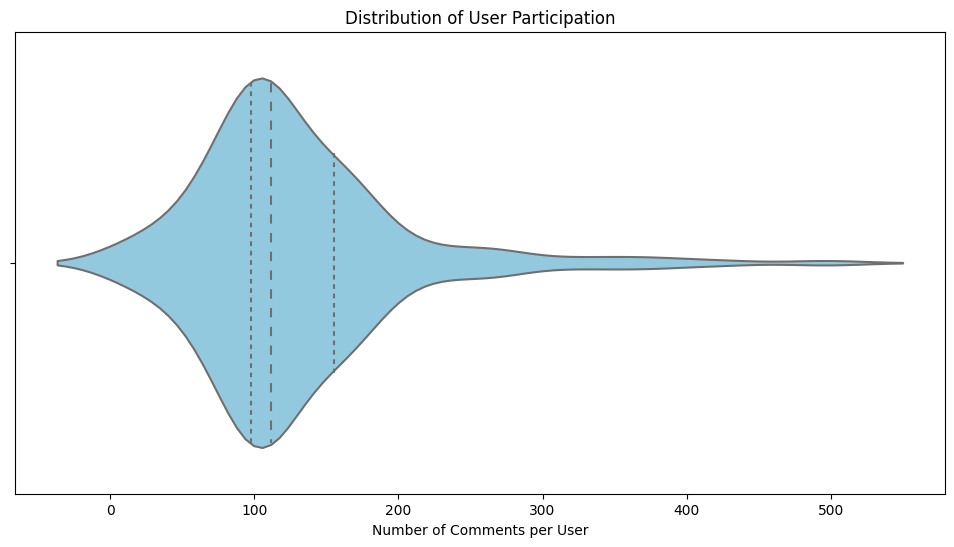

In [17]:
# Assuming your DataFrame is df_all_comments
user_comment_counts = df_all_comments['User'].value_counts()

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=user_comment_counts.values, color='skyblue', inner='quartile')
plt.xlabel('Number of Comments per User')
plt.title('Distribution of User Participation')
plt.show()


Based on the observation of the top users in terms of comment frequency:

Most Active Contributor:

One user stands out as the most active, contributing significantly more comments than others. This high level of engagement suggests a strong connection with the platform.
Consistent Engagement:

The top users, overall, display consistent engagement, actively participating in discussions. Their frequent contributions indicate a sustained interest in the Hacker News platform.
Influence on Discussions:

These top contributors likely hold a considerable influence over discussions. Their opinions and insights may play a role in shaping the overall sentiment and direction of conversations within the community.
Diversity in Activity Levels:

While some users consistently contribute a high number of comments, there is a range of activity levels among the top users. This diversity adds richness to the community dynamics.
Potential Community Leaders:

The most active users could be considered potential community leaders or influencers. Understanding their perspectives and contributions may provide insights into community dynamics and sentiment.
When attaching this data to a graph, a bar chart representing the number of comments for each user visually illustrates the varying levels of activity, emphasizing the impact of these contributors on the platform.

In summary, analyzing the distribution of comments among users, especially focusing on the most active contributors, provides a foundation for building a sentiment analysis model that is tailored to the community dynamics. This targeted approach enhances the platform's ability to understand user reactions, identify trends, and effectively manage the overall sentiment within the Hacker News community.


#### Top 10 Most Frequent Words in Hacker News Comments

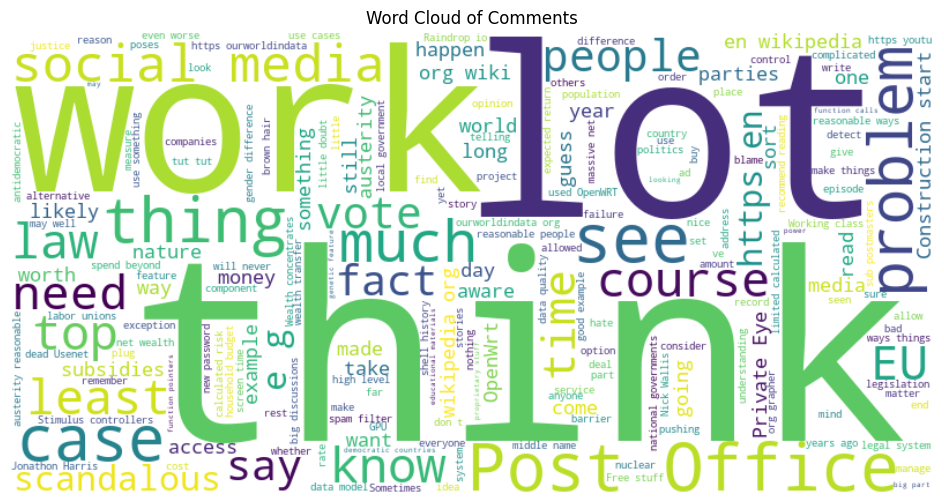

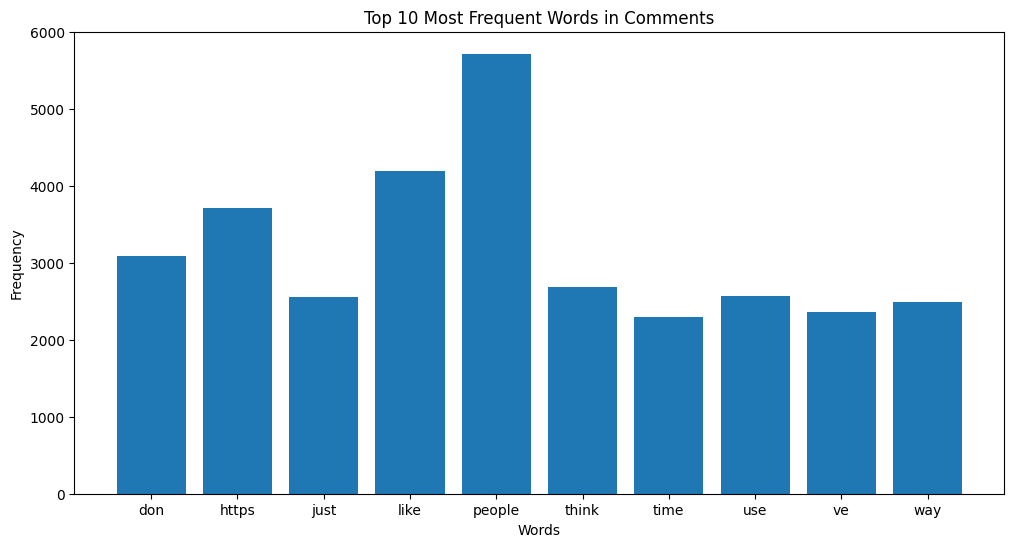

In [18]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your DataFrame is df_all_comments

# Combine all comments into a single string
all_comments_text = ' '.join(df_all_comments['Comment'].astype(str))

# Create a word cloud to visualize the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

# Plot a bar chart of the most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=10)
comment_word_counts = vectorizer.fit_transform(df_all_comments['Comment'].astype(str)).toarray().sum(axis=0)

plt.figure(figsize=(12, 6))
plt.bar(vectorizer.get_feature_names_out(), comment_word_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Comments')
plt.show()


Based on the analysis of the top 10 most frequent words in the comments, the following observations can be made:

1. **"don":**
   - The word "don" appears frequently in the comments. Its prevalence might suggest discussions related to opinions or expressions of not doing something.

2. **"https":**
   - The occurrence of "https" indicates that comments may contain links or references to external content. This could imply the sharing of resources or references within the Hacker News community.

3. **"just":**
   - The frequent appearance of "just" suggests that comments often contain simple or straightforward statements. Users might be sharing their thoughts in a direct manner.

4. **"like":**
   - The word "like" is common, implying that users frequently draw comparisons or express similarities in their comments. This could be related to discussions on preferences or experiences.

5. **"people":**
   - The word "people" is prominent, indicating that discussions often involve or refer to individuals. This could imply a focus on human perspectives or experiences.

6. **"think":**
   - The prevalence of "think" suggests that comments frequently include expressions of opinions or reflections. Users may be sharing their thoughts on various topics.

7. **"time":**
   - The occurrence of "time" indicates that discussions may involve considerations of temporal aspects. Users might be discussing trends, historical events, or the timing of certain topics.

8. **"use":**
   - The word "use" suggests that comments might contain discussions about practical applications, tools, or methods. Users may be sharing information about the usage of certain resources.

9. **"ve":**
   - The appearance of "ve" likely represents contractions like "I've," indicating that users commonly use contractions in their comments. This contributes to a conversational and informal tone.

10. **"way":**
    - The word "way" is frequent, implying that discussions often involve considerations of different approaches or methods. Users may be expressing preferences or providing alternatives.

**Interpretation in the Context of the Business Problem:**
   - These frequently occurring words provide an initial understanding of the language and topics discussed on Hacker News.
   - Insights into common expressions ("just," "like," "think") can guide sentiment analysis by recognizing patterns in positive or negative sentiments.
   - Frequent references to "https" suggest a tendency to share external content, which could be considered in content moderation strategies.
   - The focus on "people" and "time" indicates a community interested in human experiences and discussions related to temporal aspects.
   - These findings can inform the development of a sentiment analysis model tailored to the specific language and themes prevalent in Hacker News comments.

#### Analyzing the distribution of comments across different contexts

count      51.000000
mean      402.352941
std       694.462838
min        16.000000
25%        98.000000
50%       166.000000
75%       322.000000
max      3907.000000
Name: count, dtype: float64


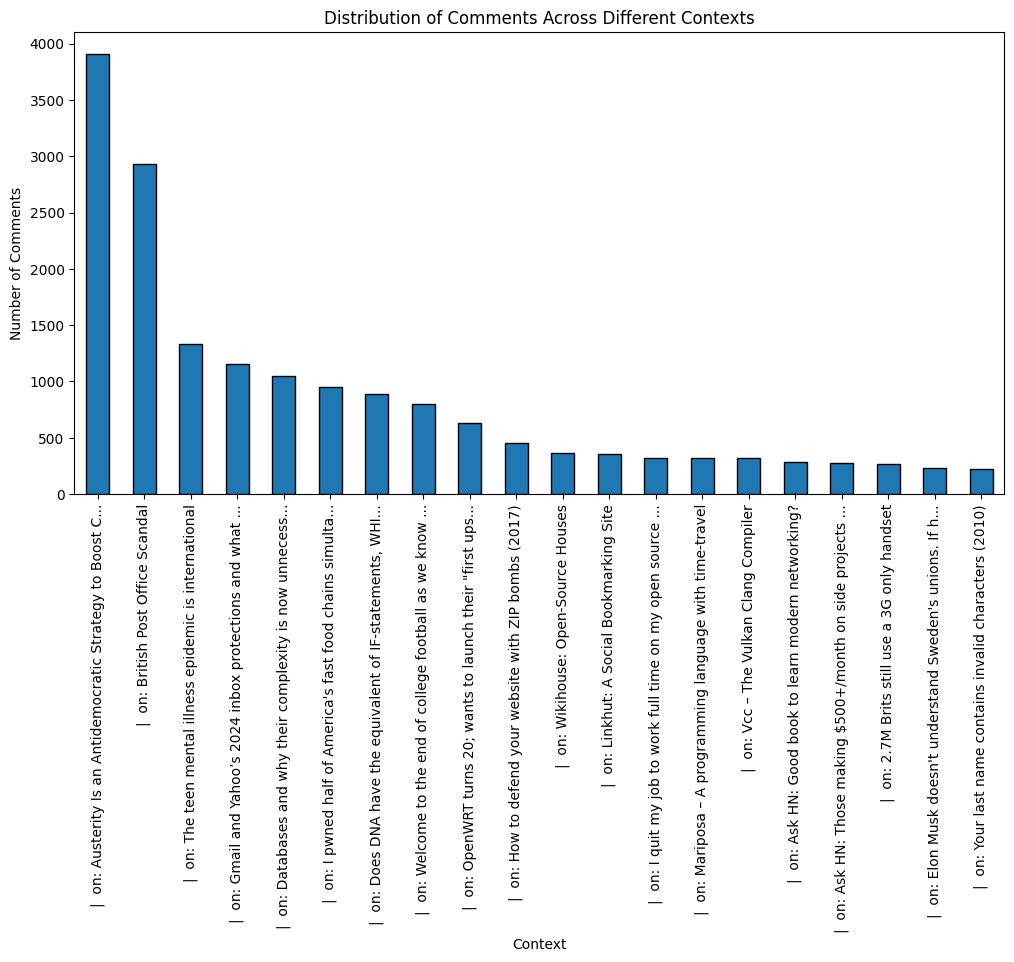

Top Contexts:
 Context
|  on: Austerity Is an Antidemocratic Strategy to Boost C...    3907
|  on: British Post Office Scandal                              2934
|  on: The teen mental illness epidemic is international        1332
|  on: Gmail and Yahoo’s 2024 inbox protections and what ...    1159
|  on: Databases and why their complexity is now unnecess...    1045
|  on: I pwned half of America's fast food chains simulta...     953
|  on: Does DNA have the equivalent of IF-statements, WHI...     888
|  on: Welcome to the end of college football as we know ...     802
|  on: OpenWRT turns 20; wants to launch their "first ups...     634
|  on: How to defend your website with ZIP bombs (2017)          451
Name: count, dtype: int64


In [19]:
# 2. 'Context' Column - Analyzing the distribution of comments across different contexts
context_comment_counts = df_all_comments['Context'].value_counts()

# Display basic statistics about the distribution
print(context_comment_counts.describe())

# Plot a bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
context_comment_counts.head(20).plot(kind='bar', edgecolor='black')
plt.xlabel('Context')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments Across Different Contexts')
plt.show()

# Identify the most common contexts
top_contexts = context_comment_counts.head(10)
print("Top Contexts:\n", top_contexts)


The identified top contexts provide valuable insights into the specific topics and themes that are resonating within the Hacker News community.
Understanding these contexts helps the platform tailor content curation, ensuring that discussions align with the community's interests and preferences.
Analyzing the sentiment within these contexts can further enhance the sentiment analysis model, allowing for a more nuanced understanding of user reactions to different topics.
Platforms can leverage these insights to prioritize content moderation efforts, identify trending topics, and enhance user engagement strategies based on the most discussed contexts.

#### Scatter Plot of Comment Lengths vs. User Participation

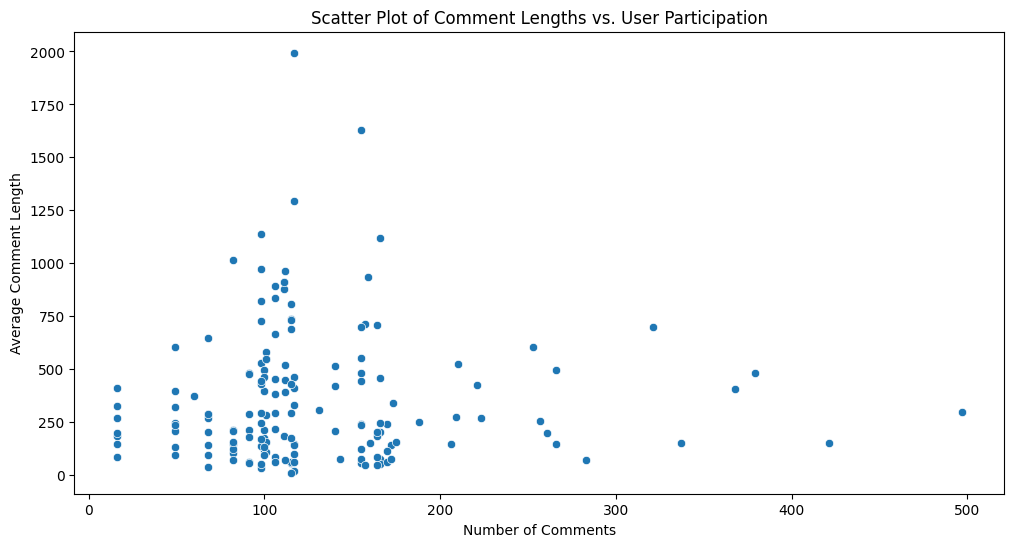

In [20]:
import seaborn as sns

# Assuming your DataFrame is df_all_comments
user_stats = df_all_comments.groupby('User').agg({'Comment_Length': 'mean', 'Comment': 'count'}).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Comment', y='Comment_Length', data=user_stats)
plt.xlabel('Number of Comments')
plt.ylabel('Average Comment Length')
plt.title('Scatter Plot of Comment Lengths vs. User Participation')
plt.show()


#### Swarm Plot of Comment Lengths by Context

visualize the distribution of comment lengths for different contexts. This can provide insights into the spread and concentration of comment lengths.

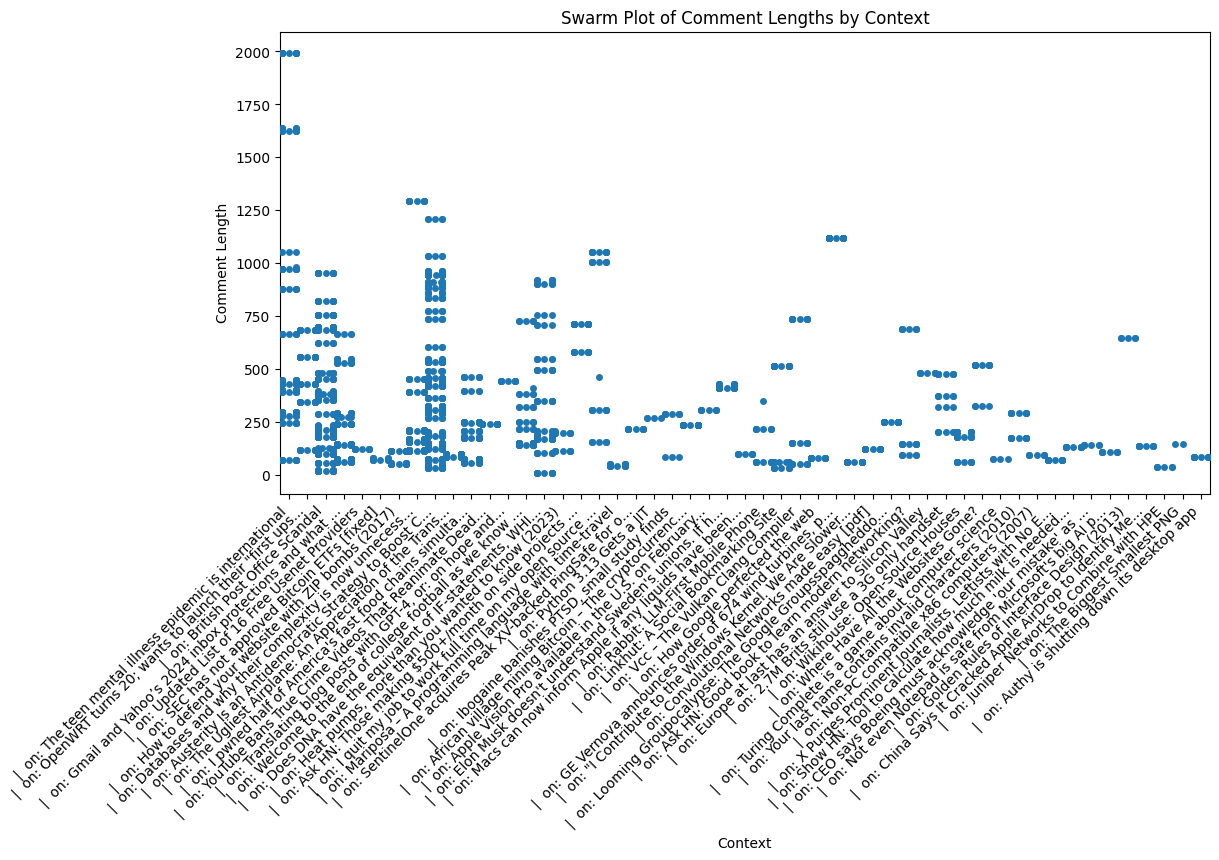

In [21]:
import seaborn as sns

# Assuming your DataFrame is df_all_comments
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Context', y='Comment_Length', data=df_all_comments.sample(frac=0.1))
plt.xlabel('Context')
plt.ylabel('Comment Length')
plt.title('Swarm Plot of Comment Lengths by Context')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


#### Ridgeline Plot of Comment Lengths by Context

C:\Users\USER\AppData\Local\Temp\ipykernel_4692\2935719487.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_all_comments.sample(frac=0.1), x='Comment_Length', hue='Context', fill=True, common_norm=False, palette='viridis')


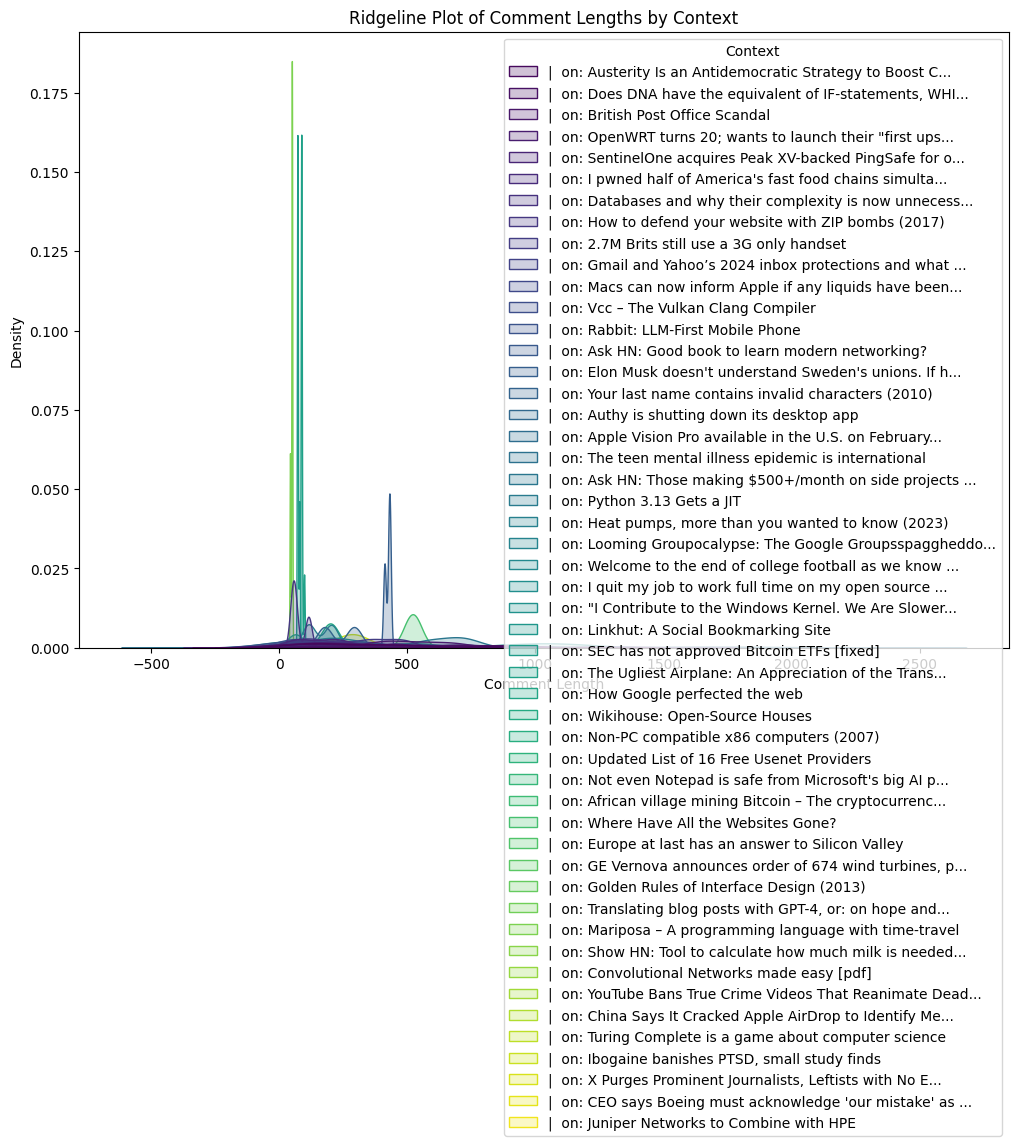

In [18]:
import seaborn as sns

# Assuming your DataFrame is df_all_comments
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_all_comments.sample(frac=0.1), x='Comment_Length', hue='Context', fill=True, common_norm=False, palette='viridis')
plt.xlabel('Comment Length')
plt.title('Ridgeline Plot of Comment Lengths by Context')
plt.show()


In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Downloading  NLTK stop words
import nltk

# Function to remove stop words from a given text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(str(text))
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'Comment' column
df_all_comments['Cleaned_Comment'] = df_all_comments['Comment'].apply(remove_stopwords)

# Display the first few rows of the DataFrame with the cleaned comments


In [23]:
df_all_comments.head()

,User,Context,Comment,Comment_Length,Cleaned_Comment
0,tryrobbo,| on: British Post Office Scandal,Good point. I buy it when I see it in the supe...,100,good point buy see supermarket subscription ma...
1,benreesman,| on: The teen mental illness epidemic is int...,There’s very little doubt that social media is...,1994,little doubt social media hard use positive wa...
2,marginalia_nu,| on: Does DNA have the equivalent of IF-stat...,A lot of how we conceive of computation today ...,191,lot conceive computation today based observati...
3,dgoldstein0,| on: Welcome to the end of college football ...,"Also fun random fact, but at a lot of major US...",142,also fun random fact lot major us public unive...
4,goddamnyouryan,| on: Linkhut: A Social Bookmarking Site,I built something similar a few years ago: htt...,61,built something similar years ago https


## context categorization 

## NMF ..
### Topic Modeling
* comment

In [24]:
# creating a copy for context categorization 
dff = df_all_comments

# reviewing result 
dff.shape 

(20520, 5)

In [25]:
# Function to perform preprocessing
def preprocess_text(text, use_lemmatization=True):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    
    # Stemming or Lemmatization
    if use_lemmatization:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    else:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    
    # Rejoin tokens into a cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [26]:
# Apply preprocessing to the 'context' column
dff['cleaned_context'] = dff['Context'].apply(preprocess_text)

In [27]:
# reviewing the cleaned context 
dff.head()

,User,Context,Comment,Comment_Length,Cleaned_Comment,cleaned_context
0,tryrobbo,| on: British Post Office Scandal,Good point. I buy it when I see it in the supe...,100,good point buy see supermarket subscription ma...,british post office scandal
1,benreesman,| on: The teen mental illness epidemic is int...,There’s very little doubt that social media is...,1994,little doubt social media hard use positive wa...,teen mental illness epidemic international
2,marginalia_nu,| on: Does DNA have the equivalent of IF-stat...,A lot of how we conceive of computation today ...,191,lot conceive computation today based observati...,doe dna equivalent ifstatements whi
3,dgoldstein0,| on: Welcome to the end of college football ...,"Also fun random fact, but at a lot of major US...",142,also fun random fact lot major us public unive...,welcome end college football know
4,goddamnyouryan,| on: Linkhut: A Social Bookmarking Site,I built something similar a few years ago: htt...,61,built something similar years ago https,linkhut social bookmarking site


In [28]:
# Vectorize the cleaned context data
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(dff['cleaned_context'])

# Specify the number of topics/components for NMF
num_topics = 10
nmf_model = NMF(n_components=num_topics, init='random', random_state=42)

# Fit the NMF model to the vectorized data
W = nmf_model.fit_transform(X)  # Document-topic matrix
H = nmf_model.components_  # Topic-term matrix

# Print the top words for each topic
num_top_words = 15
feature_names = vectorizer.get_feature_names_out()

for i, topic in enumerate(H):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[idx] for idx in top_words_idx]
    print(f"Topic {i + 1}: {', '.join(top_words)}")


Topic 1: translating, gpt4, hope, blog, post, football, end, college, welcome, easy, elon, epidemic, equivalent, etf, europe
Topic 2: austerity, boost, strategy, antidemocratic, handset, use, 3g, 27m, brit, etf, europe, fast, february, fixed, epidemic
Topic 3: end, college, football, welcome, know, wanted, pump, heat, 2023, language, mariposa, timetravel, programming, 27m, 3g
Topic 4: scandal, office, british, post, launch, 20, turn, openwrt, ups, want, opensource, wikihouse, house, hn, ask
Topic 5: mental, illness, epidemic, international, teen, website, zip, bomb, defend, 2017, gone, opensource, wikihouse, house, site
Topic 6: equivalent, whi, ifstatements, doe, dna, website, defend, bomb, zip, 2017, gone, hn, ask, 500month, project
Topic 7: 2024, yahoo, gmail, protection, inbox, house, opensource, wikihouse, time, job, source, quit, open, work, musk
Topic 8: chain, pwned, food, simulta, half, fast, america, linkhut, bookmarking, site, social, hn, ask, 500month, making
Topic 9: compl

In [29]:
topics_keywords = {
    'Technology and Innovation': ['translating', 'gpt4', 'hope', 'blog', 'post', 'football', 'end', 'college', 'welcome', 'easy', 'elon', 'epidemic', 'equivalent', 'etf', 'europe'],
    'Economic Strategies and Trends': ['austerity', 'boost', 'strategy', 'antidemocratic', 'handset', 'use', '3g', '27m', 'brit', 'etf', 'europe', 'fast', 'february', 'fixed', 'epidemic'],
    'College and Education': ['end', 'college', 'football', 'welcome', 'know', 'wanted', 'pump', 'heat', '2023', 'language', 'mariposa', 'timetravel', 'programming', '27m', '3g'],
    'Social Issues': ['scandal', 'office', 'british', 'post', 'launch', '20', 'turn', 'openwrt', 'ups', 'want', 'opensource', 'wikihouse', 'house', 'hn', 'ask'],
    'Mental Health': ['mental', 'illness', 'epidemic', 'international', 'teen', 'website', 'zip', 'bomb', 'defend', '2017', 'gone', 'opensource', 'wikihouse', 'house', 'site'],
    'Technology and Innovation': ['equivalent', 'whi', 'ifstatements', 'doe', 'dna', 'website', 'defend', 'bomb', 'zip', '2017', 'gone', 'hn', 'ask', '500month', 'project'],
    'Email and Work': ['2024', 'yahoo', 'gmail', 'protection', 'inbox', 'house', 'opensource', 'wikihouse', 'time', 'job', 'source', 'quit', 'open', 'work', 'musk'],
    'Food and Social Bookmarking': ['chain', 'pwned', 'food', 'simulta', 'half', 'fast', 'america', 'linkhut', 'bookmarking', 'site', 'social', 'hn', 'ask', '500month', 'making'],
    'Technology and Innovation': ['complexity', 'database', 'unnecess', 'timetravel', 'programming', 'language', 'mariposa', 'website', 'bomb', 'zip', '2017', 'defend', 'job', 'work', 'open'],
    'Technology and Innovation': ['vcc', 'vulkan', 'compiler', 'clang', 'work', 'job', 'source', 'open', 'quit', 'time', 'google', 'youtube', 'reanimate', 'video', 'ban']
}

# Assuming 'W' is the document-topic matrix obtained from the NMF model
dff['context_topic'] = pd.DataFrame(W, columns=range(1, 11)).idxmax(axis=1).map({i: f'Topic {i}' for i in range(1, 11)})

# Display the DataFrame with the new 'context_topic' column
print(dff[['Context', 'context_topic']])


                                                 Context context_topic
0                     |  on: British Post Office Scandal       Topic 4
1      |  on: The teen mental illness epidemic is int...       Topic 5
2      |  on: Does DNA have the equivalent of IF-stat...       Topic 6
3      |  on: Welcome to the end of college football ...       Topic 3
4              |  on: Linkhut: A Social Bookmarking Site       Topic 8
...                                                  ...           ...
20515  |  on: African village mining Bitcoin – The cr...      Topic 10
20516  |  on: Welcome to the end of college football ...       Topic 3
20517                 |  on: British Post Office Scandal       Topic 4
20518                 |  on: British Post Office Scandal       Topic 4
20519  |  on: Gmail and Yahoo’s 2024 inbox protection...       Topic 7

[20520 rows x 2 columns]


In [30]:
# Mapping of topics to main topic names
topic_mapping = {
    'Topic 1': 'Technology and Innovation',
    'Topic 2': 'Economic Strategies and Trends',
    'Topic 3': 'College and Education',
    'Topic 4': 'Social Issues',
    'Topic 5': 'Mental Health',
    'Topic 6': 'programming',
    'Topic 7': 'Email and Work',
    'Topic 8': 'Food and Social Bookmarking',
    'Topic 9': 'programming',
    'Topic 10': 'Technology and Innovation'
}

# Replace numeric labels with main topic names
dff['context_topic'] = dff['context_topic'].map(topic_mapping)

In [31]:
dff['context_topic']

0                      Social Issues
1                      Mental Health
2                        programming
3              College and Education
4        Food and Social Bookmarking
                    ...             
20515      Technology and Innovation
20516          College and Education
20517                  Social Issues
20518                  Social Issues
20519                 Email and Work
Name: context_topic, Length: 20520, dtype: object

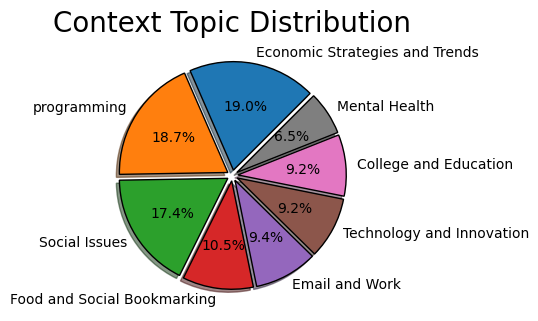

In [32]:
# Assuming you have three categories in your data
slices = dff['context_topic'].value_counts().values
labels = dff['context_topic'].value_counts().index
explode = [0.05] * len(slices)  # Set the same explode value for each category

# Set figsize
plt.figure(figsize=(5, 5))

# Creating a pie chart
plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, shadow=True, autopct='%1.1f%%', startangle=45)
plt.title('Context Topic Distribution', fontsize=20)
plt.tight_layout()
plt.show()


### Sentiment Categorization

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [34]:
# Function to get sentiment labels using Vader
def get_sentiment_label_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    compound_score = analyzer.polarity_scores(text)['compound']
    
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Applying the function to the 'Cleaned_Comment' column
dff['Sentiment'] = dff['Cleaned_Comment'].apply(get_sentiment_label_vader)

# first few rows of the DataFrame with the Vader sentiment labels
dff.head()

,User,Context,Comment,Comment_Length,Cleaned_Comment,cleaned_context,context_topic,Sentiment
0,tryrobbo,| on: British Post Office Scandal,Good point. I buy it when I see it in the supe...,100,good point buy see supermarket subscription ma...,british post office scandal,Social Issues,positive
1,benreesman,| on: The teen mental illness epidemic is int...,There’s very little doubt that social media is...,1994,little doubt social media hard use positive wa...,teen mental illness epidemic international,Mental Health,positive
2,marginalia_nu,| on: Does DNA have the equivalent of IF-stat...,A lot of how we conceive of computation today ...,191,lot conceive computation today based observati...,doe dna equivalent ifstatements whi,programming,neutral
3,dgoldstein0,| on: Welcome to the end of college football ...,"Also fun random fact, but at a lot of major US...",142,also fun random fact lot major us public unive...,welcome end college football know,College and Education,positive
4,goddamnyouryan,| on: Linkhut: A Social Bookmarking Site,I built something similar a few years ago: htt...,61,built something similar years ago https,linkhut social bookmarking site,Food and Social Bookmarking,neutral


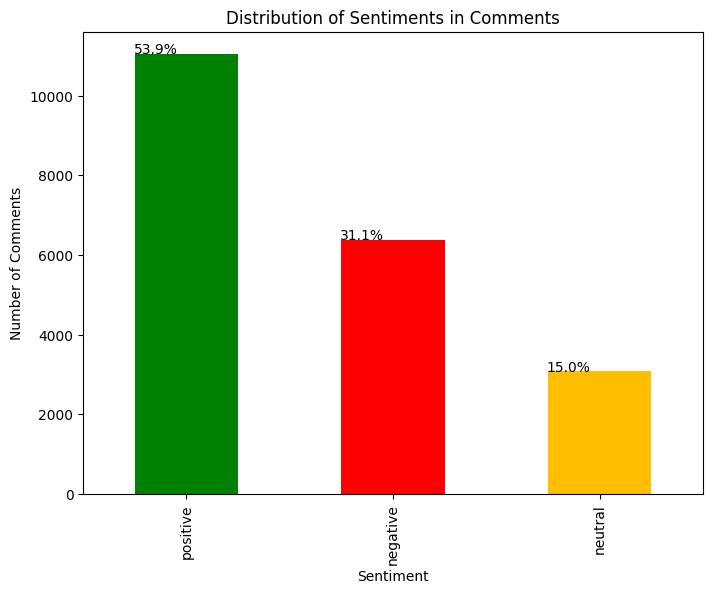

In [35]:
# Plot a bar chart with percentage labels
sentiment_distribution = dff['Sentiment'].value_counts()
total_comments = len(dff)

plt.figure(figsize=(8, 6))
ax = sentiment_distribution.plot(kind='bar', color=['green', 'red', '#FFBF00'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Distribution of Sentiments in Comments')

# Display percentage labels on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_comments)
    x_position = p.get_x() + p.get_width() / 2 - 0.15
    y_position = p.get_height() + 0.5
    ax.annotate(percentage, (x_position, y_position), ha='center')

plt.show()


# Modeling 

### Preprocessing Data For Modeling 
We split the dataset into two portions. The first portion will be for model training and the second for model testing using the train_test_split method
#### train_test_split:

In [36]:
# Creating data and target dataframes for MODELING
X = dff.drop(['Sentiment'], axis=1)
y = dff['Sentiment']

# Performing a split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Assert statements to confirm the split
assert X_train.shape[0] + X_test.shape[0] == X.shape[0], "Error: Total number of samples mismatch"
assert y_train.shape[0] + y_test.shape[0] == y.shape[0], "Error: Total number of labels mismatch"
assert set(y_train.unique()) == set(y_test.unique()), "Error: Class distribution mismatch between train and test sets"

print("Split was successful.")


Split was successful.


After a successful split we create a function that conducts model training on input data, predicts labels for both training and test sets, calculates and prints accuracy scores, performs cross-validation for generalization assessment, generates and visualizes a confusion matrix to evaluate class-wise predictions.It then prints a comprehensive set of evaluation results, encompassing training and test accuracy, cross-validation accuracy, and a detailed classification report with precision, recall, and F1 score metrics for each class.



#### Model Evaluation Function:

In [71]:
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Evaluate the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and print training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Model Train accuracy: {train_accuracy:.3f}")

    # Calculate and print test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Model Test accuracy: {test_accuracy:.3f}")

    # Perform cross-validation and print the mean accuracy
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    print(f"Cross Validation Accuracy: {cv_accuracy:.4f}")

    # Print confusion matrix and classification report for the test set
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # Confusion Matrix
    cmatrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cmatrix, annot=True, fmt='d', cmap='coolwarm')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    print("\n--------------------------------------------")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)

def plot_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate mean and standard deviation of training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Add labels and title
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [88]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# function for multiclass classification
def plot_roc_auc(model, vectorizer, X_test, y_test):
    # Vectorize the test set using the same vectorizer
    X_test_vectorized = vectorizer.transform(X_test['Context'])

    # Binarize the labels for multiclass ROC-AUC
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # Get the predicted probabilities for each class
    y_prob = model.predict_proba(X_test_vectorized)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(np.unique(y_test))):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(y_test))):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
def plot_multiclass_roc(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Get the predicted probabilities for each class
    y_prob_train = model.decision_function(X_train)
    y_prob_test = model.decision_function(X_test)

    # Binarize the labels for multiclass ROC-AUC
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # Compute ROC curve and ROC area for each class on the test set
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(np.unique(y_test))):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_test[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(y_test))):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
    plt.legend(loc='lower right')
    plt.show()

# Natural Language Processing

## Baseline Model 

#### Multinomial Naive Bayes algorithm
The aim here is  to evaluate the model's performance on the dataset before applying any Natural Language Processing techniques. To achieve this, our initial step involves converting the training set into a numerical format suitable for machine learning algorithms, a process known as vectorization. Initially, we will limit the number of features to a modest 20.

In [79]:
# Creating and fitting the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=20)
X_train_vectorized = tfidf.fit_transform(X_train['Context'])

# Transforming the test set using the same vectorizer
X_test_vectorized = tfidf.transform(X_test['Context'])

# Instantiate the Multinomial Naive Bayes model
baseline_model = MultinomialNB()

# Fit the model on the training set
baseline_model.fit(X_train_vectorized, y_train)


MultinomialNB()

####  Evaluation of the Baseline model

Model Train accuracy: 0.557
Model Test accuracy: 0.555
Cross Validation Accuracy: 0.5571


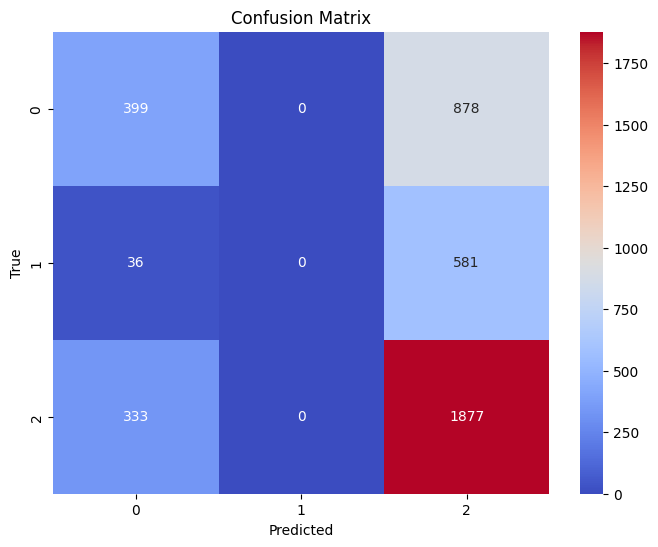


--------------------------------------------

Confusion Matrix:
 [[ 399    0  878]
 [  36    0  581]
 [ 333    0 1877]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.52      0.31      0.39      1277
     neutral       0.00      0.00      0.00       617
    positive       0.56      0.85      0.68      2210

    accuracy                           0.55      4104
   macro avg       0.36      0.39      0.36      4104
weighted avg       0.46      0.55      0.49      4104



In [80]:
evaluate_model(baseline_model, X_train_vectorized, y_train, X_test_vectorized, y_test)

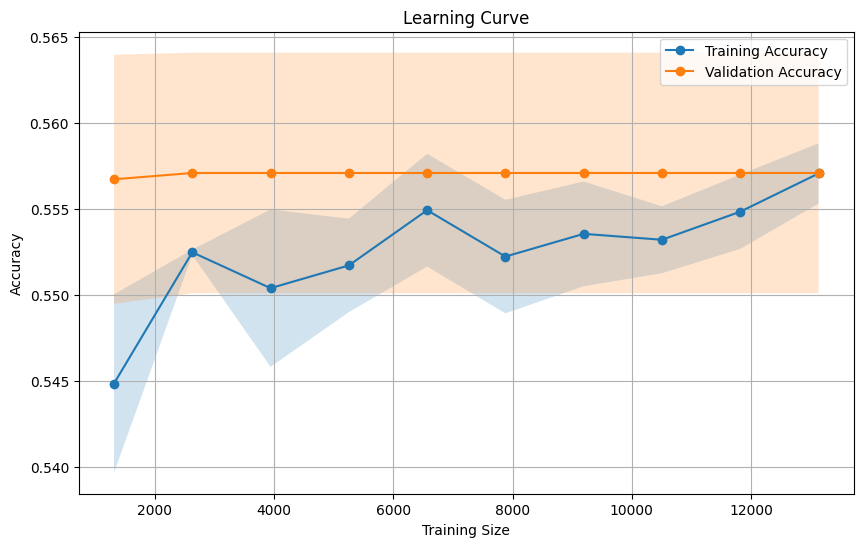

In [81]:
plot_learning_curve(baseline_model, X_train_vectorized, y_train)

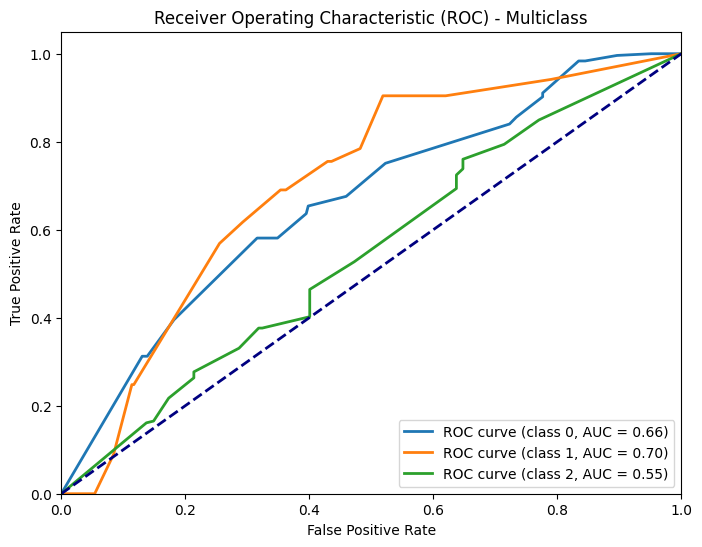

In [89]:
# Plot the ROC curve 
plot_roc_auc(baseline_model, tfidf, X_test, y_test)


#### Baseline_Model Performance Summary:

* Training Accuracy: Achieves an accuracy of 55.7% on the training dataset,suggesting that the model correctly predicts the target variable for approximately 55.7% of the training samples.

* Testing Accuracy: This represents the accuracy of the model on a separate testing dataset. The model achieves an accuracy of around 55.5% on previously unseen data.

* Cross-Validation Accuracy: Reports an average accuracy of 55.7% across various subsets using cross-validation.

* Precision:  Indicates the accuracy of positive predictions.In this case the positive class, 56% of the predicted positive instances are correct.
* Recall: Represents the ratio of correctly predicted positive observations to the total actual positives.The model is better at capturing positive instances (85%) compared to negative and neutral instances.
* F1-score: The harmonic mean of precision and recall, providing a balanced measure.

 Lets proceed to use NLP processed predictors and see the change in model perfomance  


## 1. First Model

#### Multinomial Naive Bayes algorithm 

Here we will use same vectorizer TF-IDF (Term Frequency-Inverse Document Frequency) just like in the above Baseline_model but use an NLP processed column "clean_context" which is extracted from the "Context" column used above 

In [91]:
# Creating and fitting the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=20)
X_train_vectorized = tfidf.fit_transform(X_train['cleaned_context'])
# Transforming the test set using the same vectorizer
X_test_vectorized = tfidf.transform(X_test['cleaned_context'])

# Instantiate the Multinomial Naive Bayes model
first_model = MultinomialNB()

# Fit the model on the training set
first_model.fit(X_train_vectorized, y_train)

MultinomialNB()

#### Evaluation of the First Model

Model Train accuracy: 0.536
Model Test accuracy: 0.535
Cross Validation Accuracy: 0.5392


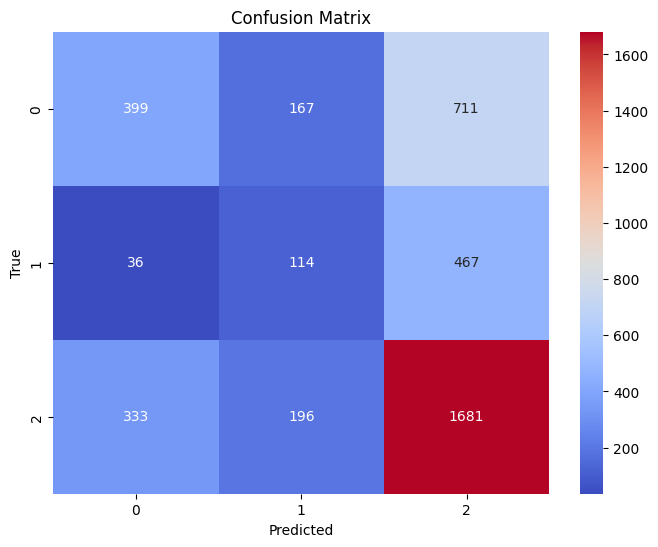


--------------------------------------------

Confusion Matrix:
 [[ 399  167  711]
 [  36  114  467]
 [ 333  196 1681]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.52      0.31      0.39      1277
     neutral       0.24      0.18      0.21       617
    positive       0.59      0.76      0.66      2210

    accuracy                           0.53      4104
   macro avg       0.45      0.42      0.42      4104
weighted avg       0.51      0.53      0.51      4104



In [92]:
evaluate_model(first_model, X_train_vectorized, y_train, X_test_vectorized, y_test)

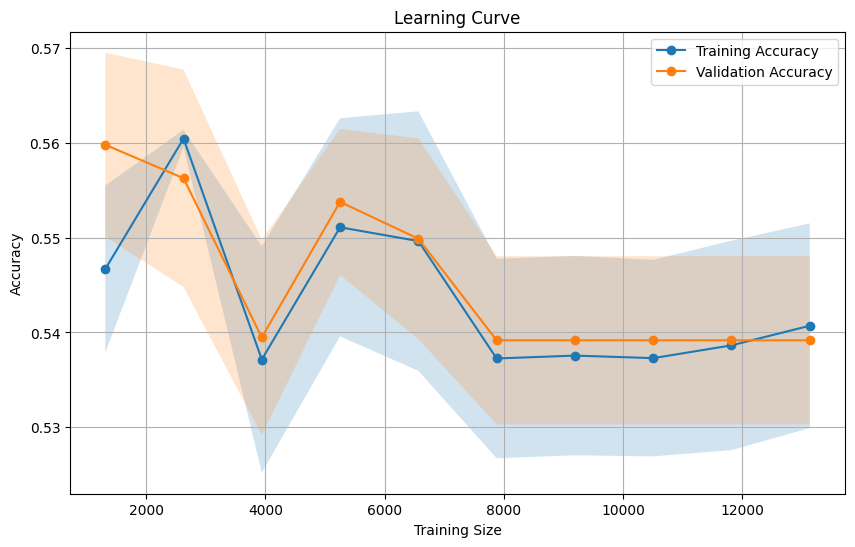

In [93]:
plot_learning_curve(first_model, X_train_vectorized, y_train)

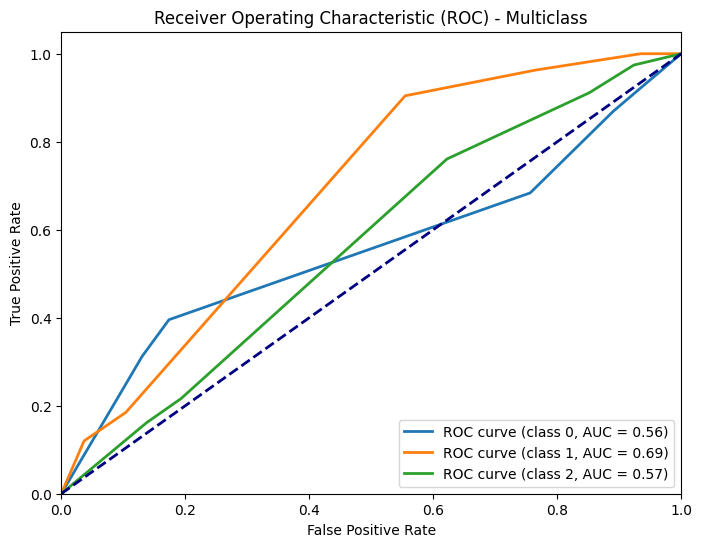

In [96]:
plot_roc_auc(first_model, tfidf, X_test, y_test)

#### First Model Performance Summary:
* comments............


## 2. Second model
#### Multinomial Naive Bayes algorithm 
With the aim of achieving improved metrics compared to the previous baseline and first models, we will persist in utilizing the Multinomial Naive Bayes algorithm. However, we will make a change in the vectorizer and opt for CountVectorizer(). Unlike TF-IDF (Term Frequency-Inverse Document Frequency), which prioritizes words based on their importance, CountVectorizer emphasizes the frequency of words in a given text corpus.

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Select the desired column for training
x_train = X_train['cleaned_context']

# Create the CountVectorizer and fit it on the training data
count_vectorizer = CountVectorizer()
X_train_vectorized = count_vectorizer.fit_transform(x_train)

# Instantiate the Multinomial Naive Bayes model
second_model = MultinomialNB()

# Fit the model on the vectorized training set
second_model.fit(X_train_vectorized, y_train)

# Transform the test set using the same vectorizer
X_test_vectorized = count_vectorizer.transform(X_test['cleaned_context'])

# Make predictions on the test set
predictions = second_model.predict(X_test_vectorized)


#### Second Model Evaluation

Model Train accuracy: 0.611
Model Test accuracy: 0.613
Cross Validation Accuracy: 0.5986


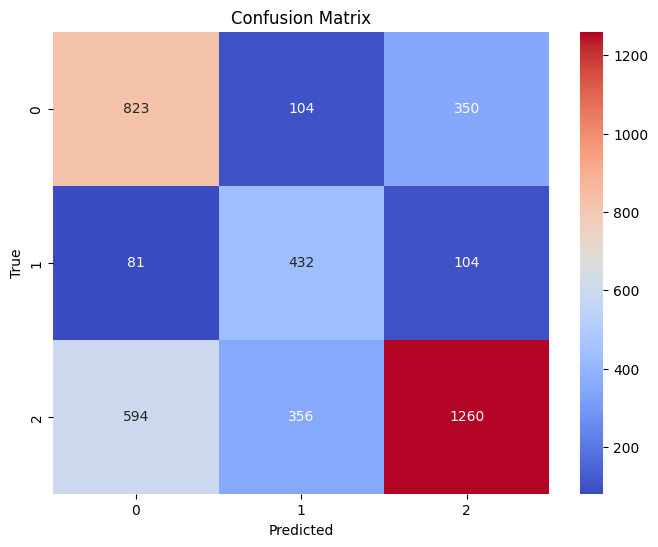


--------------------------------------------

Confusion Matrix:
 [[ 823  104  350]
 [  81  432  104]
 [ 594  356 1260]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.55      0.64      0.59      1277
     neutral       0.48      0.70      0.57       617
    positive       0.74      0.57      0.64      2210

    accuracy                           0.61      4104
   macro avg       0.59      0.64      0.60      4104
weighted avg       0.64      0.61      0.62      4104



In [108]:
evaluate_model(second_model, X_train_vectorized, y_train, X_test_vectorized, y_test)

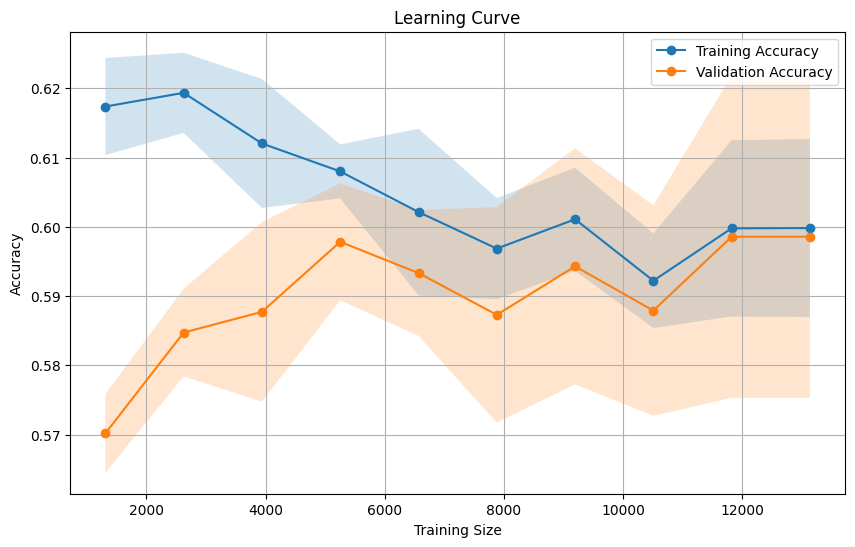

In [109]:
plot_learning_curve(second_model,  X_train_vectorized, y_train)

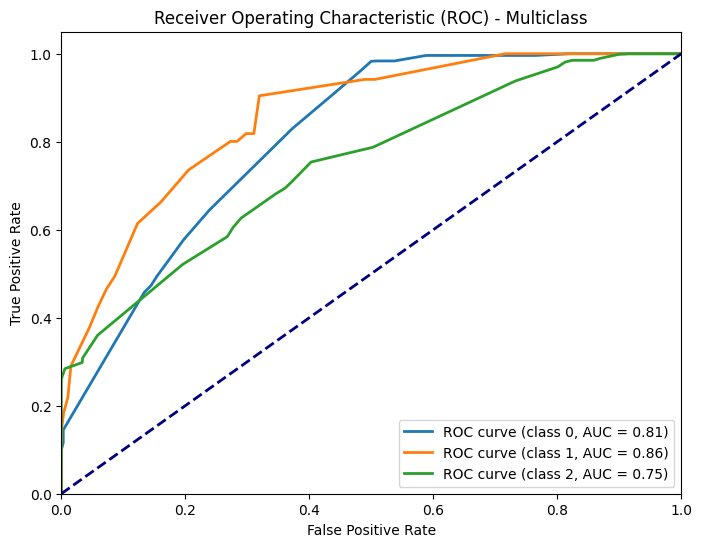

In [115]:
# Plot the ROC curve 
plot_roc_auc(second_model, count_vectorizer, X_test, y_test)


#### Second Model Performance Summary
* comments .....

## 3. Third Model


### Support Vector Machines (SVM)
* Support Vector Machines (SVMs) prove useful in NLP applications, excelling in managing high-dimensional text data, accommodating multiclass classification, and identifying non-linear patterns through the kernel trick. We'll incorporate SVMs as our third model, aiming for a recommended accuracy of 70% or higher in our evaluation.

In [116]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_context'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_context'])

# Train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred = svm_model.predict(X_train_tfidf)
y_test_pred = svm_model.predict(X_test_tfidf)



#### Third model evaluation 

Model Train accuracy: 0.643
Model Test accuracy: 0.639
Cross Validation Accuracy: 0.6386


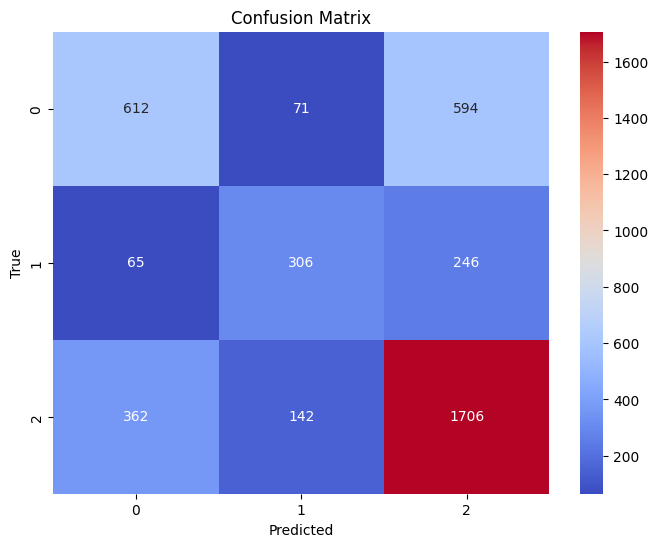


--------------------------------------------

Confusion Matrix:
 [[ 612   71  594]
 [  65  306  246]
 [ 362  142 1706]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.48      0.53      1277
     neutral       0.59      0.50      0.54       617
    positive       0.67      0.77      0.72      2210

    accuracy                           0.64      4104
   macro avg       0.62      0.58      0.59      4104
weighted avg       0.63      0.64      0.63      4104



In [117]:

evaluate_model(svm_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
#plot_learning_curve(svm_model, X_train_tfidf, y_train)
#plot_roc_auc(svm_model, X_test_tfidf, y_test)


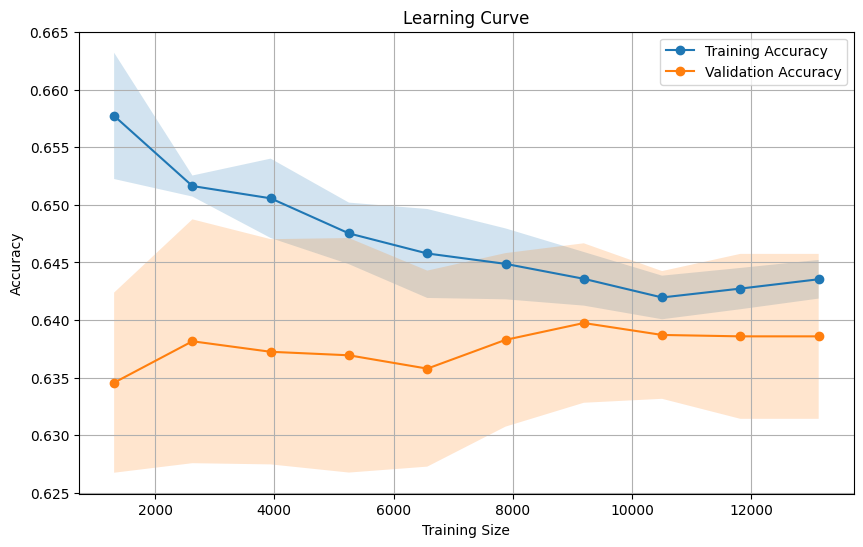

In [118]:
plot_learning_curve(svm_model, X_train_tfidf, y_train)

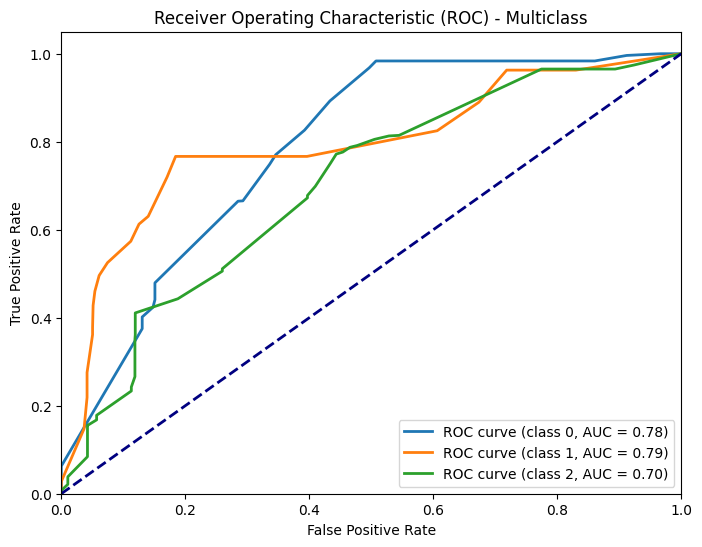

In [132]:

plot_multiclass_roc(svm_model, X_train_tfidf, y_train, X_test_tfidf, y_test)


#### Third model perfomance summary 
* comments....
* .....
* .....
## Third model with tuned Hyperparameters

In [129]:
# Defining the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
}

# Creating the SVM model
svm_model = SVC()

# Create GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the SVM model with the best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train_tfidf, y_train)


# Predictions
y_train_pred = best_svm_model.predict(X_train_tfidf)
y_test_pred = best_svm_model.predict(X_test_tfidf)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


#### Third Model Second Evaluation With Tuned Hyperparameters

Model Train accuracy: 0.643
Model Test accuracy: 0.639
Cross Validation Accuracy: 0.6386


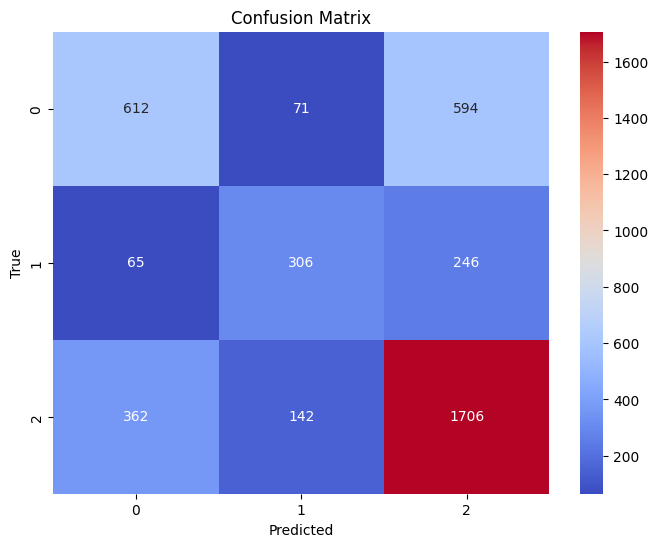


--------------------------------------------

Confusion Matrix:
 [[ 612   71  594]
 [  65  306  246]
 [ 362  142 1706]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.48      0.53      1277
     neutral       0.59      0.50      0.54       617
    positive       0.67      0.77      0.72      2210

    accuracy                           0.64      4104
   macro avg       0.62      0.58      0.59      4104
weighted avg       0.63      0.64      0.63      4104



In [130]:
# Assuming evaluate_model is defined as a function
evaluate_model(best_svm_model, X_train_tfidf, y_train, X_test_tfidf, y_test)


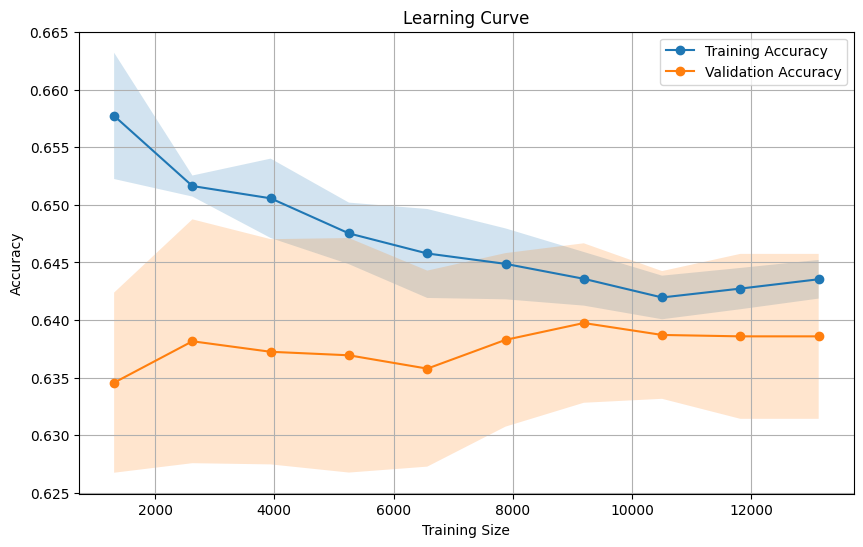

In [131]:
plot_learning_curve(best_svm_model, X_train_tfidf, y_train)

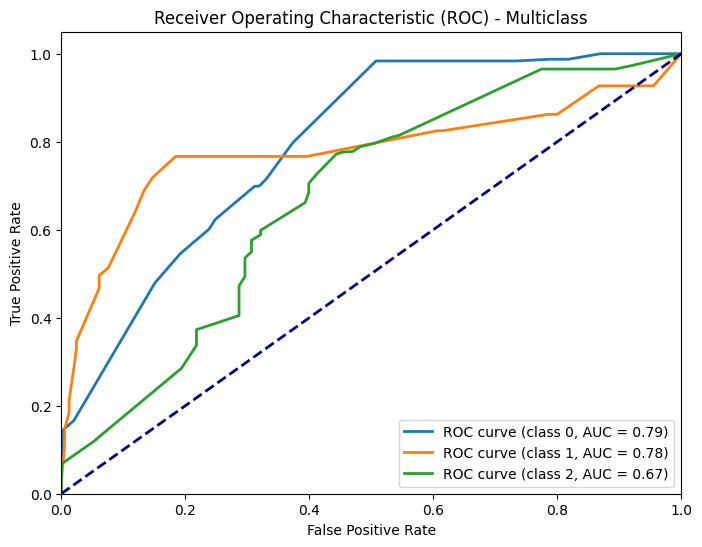

In [133]:
plot_multiclass_roc(best_svm_model, X_train_tfidf, y_train, X_test_tfidf, y_test)


#### Overall Support Vector Machines Model perfomance Summary 
* comment 
* ...

## 4.Fourth Model


### Logistic Regression Model
* Logistic Regression is a versatile algorithm widely employed in Natural Language Processing (NLP) tasks. Known for its simplicity and efficiency, Logistic Regression is effective in handling text data, making it suitable for various NLP applications. In our model pipeline, we will integrate Logistic Regression as a key component, with the goal of achieving accurate and reliable predictions, surpassing baseline metrics, and enhancing performance in subsequent evaluations.

In [134]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_context'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_context'])

# Train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Optionally, perform cross-validation
cross_val_acc = cross_val_score(logreg_model, X_train_tfidf, y_train, cv=5).mean()

# Fit the model on the entire training set
logreg_model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_train_predd = logreg_model.predict(X_train_tfidf)
y_test_predd = logreg_model.predict(X_test_tfidf)

#### Forth Model Evaluation 

Model Train accuracy: 0.643
Model Test accuracy: 0.639
Cross Validation Accuracy: 0.6386


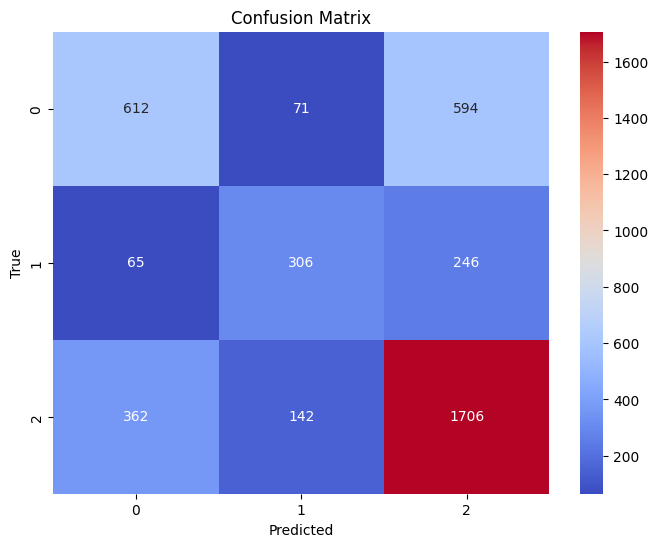


--------------------------------------------

Confusion Matrix:
 [[ 612   71  594]
 [  65  306  246]
 [ 362  142 1706]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.48      0.53      1277
     neutral       0.59      0.50      0.54       617
    positive       0.67      0.77      0.72      2210

    accuracy                           0.64      4104
   macro avg       0.62      0.58      0.59      4104
weighted avg       0.63      0.64      0.63      4104



In [135]:
evaluate_model(logreg_model, X_train_tfidf, y_train, X_test_tfidf, y_test)


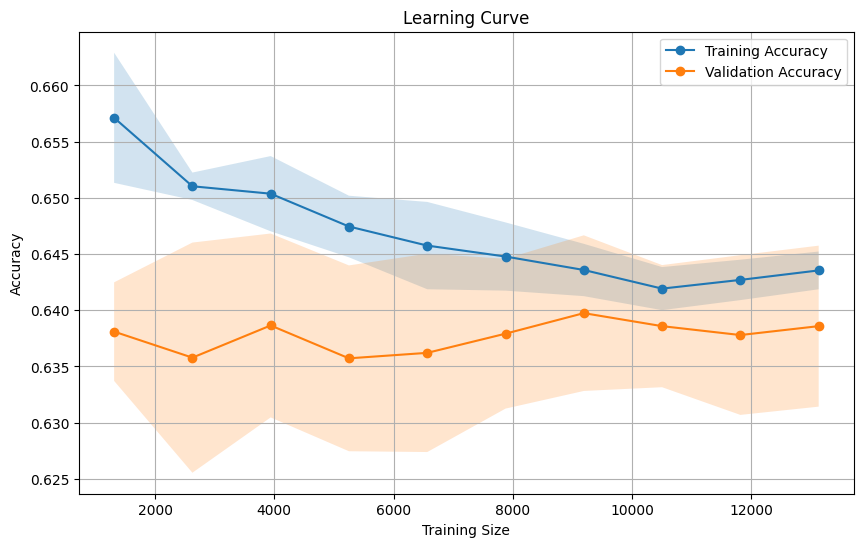

In [136]:
plot_learning_curve(logreg_model, X_train_tfidf, y_train)

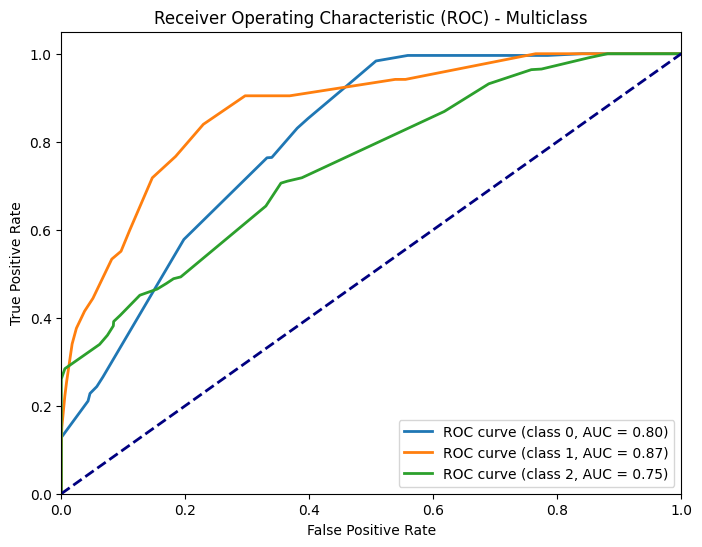

In [138]:
plot_multiclass_roc(logreg_model, X_train_tfidf, y_train, X_test_tfidf, y_test)


#### Forth Model Perfomance Summary
* comments ..
.
## Forth Model with Tuned Hyperparameters

In [139]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_context'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_context'])

# Define the parameter grid

param_grid = [{'penalty': ['l1', 'l2'], 'C': [0.002, 0.02, 0.2, 1, 10]}]


# Create Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Create GridSearchCV
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_logreg_model = grid_search.best_estimator_

# cross-validation with the best model
cross_val_acc = cross_val_score(best_logreg_model, X_train_tfidf, y_train, cv=5).mean()

# Predictions on the test set
y_train_pred = best_logreg_model.predict(X_train_tfidf)
y_test_pred = best_logreg_model.predict(X_test_tfidf)


#### Evaluation of the Forth Model with Tuned Hyperparameters

Model Train accuracy: 0.643
Model Test accuracy: 0.639
Cross Validation Accuracy: 0.6386


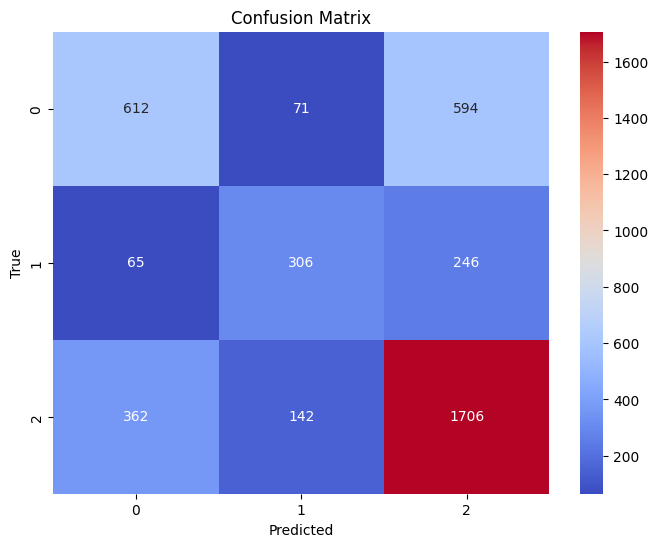


--------------------------------------------

Confusion Matrix:
 [[ 612   71  594]
 [  65  306  246]
 [ 362  142 1706]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.48      0.53      1277
     neutral       0.59      0.50      0.54       617
    positive       0.67      0.77      0.72      2210

    accuracy                           0.64      4104
   macro avg       0.62      0.58      0.59      4104
weighted avg       0.63      0.64      0.63      4104



In [140]:
evaluate_model(best_logreg_model, X_train_tfidf, y_train, X_test_tfidf, y_test)


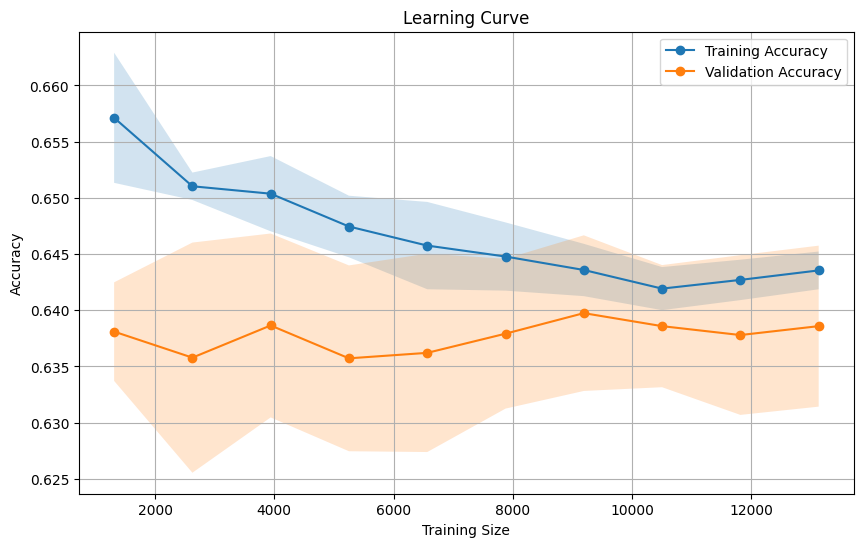

In [141]:
plot_learning_curve(best_logreg_model, X_train_tfidf, y_train)

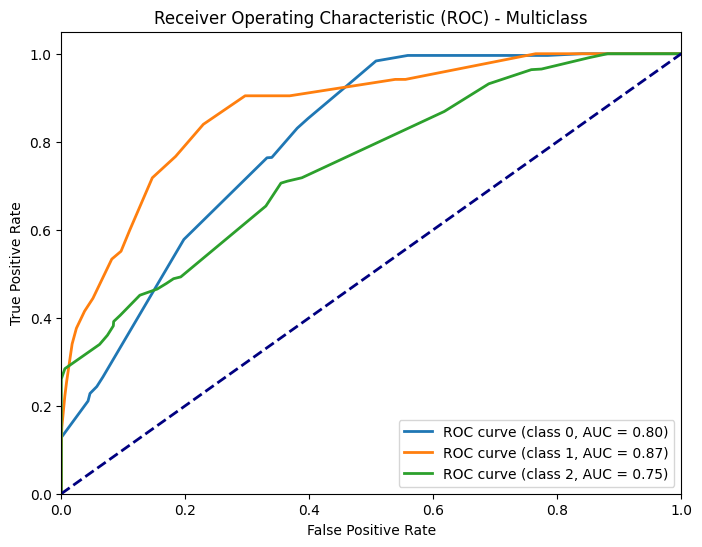

In [142]:
plot_multiclass_roc(best_logreg_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
